#Statement
size of dataset: 506 images scraped from Google with 4 keywords(writing on the signboard, writing on the roof, writing on the ceiling, writing at the entrance)

how I gathered data: I used data scraping skills to scrape these data from Google

datatype of the dataset: image format such as JPEG, PNG, GIF, WEBP

Train your own image classification model on a collection of images with at least 4 different categories.

In [ ]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

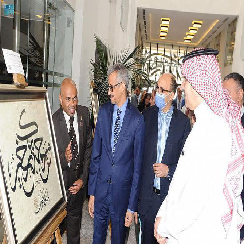

In [ ]:
calligraphyonthesignboard_image_id = os.listdir('/content/drive/MyDrive/images/writing on the signboard')[0]
calligraphyonthesignboard_path = os.path.join('/content/drive/MyDrive/images/writing on the signboard', calligraphyonthesignboard_image_id)
calligraphyonthesignboard_image = load_image(calligraphyonthesignboard_path)

tf.keras.preprocessing.image.load_img(calligraphyonthesignboard_path, target_size=(244,244))

In [ ]:
model.predict(calligraphyonthesignboard_image)

1/1 [==============================] - 1s 1s/step


array([[2.56530120e-06, 2.06018376e-05, 4.15034629e-05, 2.44405328e-06,
        6.45335604e-06, 1.90086830e-05, 3.12307452e-06, 7.46640289e-05,
        7.48021466e-06, 8.64159517e-07, 1.41418298e-06, 3.78388245e-06,
        4.00531007e-06, 2.65029001e-07, 9.56055828e-07, 1.73148919e-06,
        7.30291902e-07, 6.93932122e-07, 2.25808935e-06, 1.63027082e-07,
        7.62570153e-07, 5.37788901e-06, 4.53483381e-06, 1.81632244e-03,
        4.43567387e-06, 2.31976202e-07, 1.29845273e-06, 6.26873032e-07,
        3.74442550e-07, 9.91883553e-08, 1.57643881e-05, 1.10301096e-06,
        9.61312935e-07, 1.51565255e-04, 5.60936969e-05, 1.19363472e-06,
        5.99276109e-06, 7.38024994e-07, 4.11983081e-07, 1.33924923e-05,
        1.09487445e-07, 2.62772488e-07, 1.90720993e-06, 1.97420059e-06,
        3.37024176e-07, 1.20671371e-04, 1.32388635e-07, 3.09758121e-07,
        1.05536847e-05, 1.78517439e-05, 8.49060325e-06, 8.64399044e-06,
        4.83765916e-07, 5.22743505e-07, 3.93619700e-07, 2.077595

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
model.predict(calligraphyonthesignboard_image).shape

1/1 [==============================] - 1s 514ms/step


(1, 1024)

In [ ]:
x = Dropout(rate=0.4)(model.output)
x = Dense(4)(x)
x = Softmax()(x)
model = Model(model.inputs, x)

In [ ]:
for layer in model.layers[:-3]:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/drive/MyDrive/images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/drive/MyDrive/images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 440 images belonging to 4 classes.
Found 46 images belonging to 4 classes.


In [ ]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    # this needs to be much higher than 1, but for demo here we'll keep it at this
    epochs=1,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

13/13 [==============================] - 165s 12s/step - loss: 1.6960 - val_loss: 1.2751


In [ ]:
random_calligraphyonthesignboard = random.choice(os.listdir('/content/drive/MyDrive/images/writing on the signboard'))
calligraphyonthesignboard_path = os.path.join('/content/drive/MyDrive/images/writing on the signboard', random_calligraphyonthesignboard)
calligraphyonthesignboard = load_image(calligraphyonthesignboard_path)

random_calligraphyontheceiling = random.choice(os.listdir('/content/drive/MyDrive/images/writing on the ceiling'))
calligraphyontheceiling_path = os.path.join('/content/drive/MyDrive/images/writing on the ceiling', random_calligraphyontheceiling)
calligraphyontheceiling = load_image(calligraphyontheceiling_path)

random_calligraphyontheroof = random.choice(os.listdir('/content/drive/MyDrive/images/writing on the roof'))
calligraphyontheroof_path = os.path.join('/content/drive/MyDrive/images/writing on the roof', random_calligraphyontheroof)
calligraphyontheroof = load_image(calligraphyontheroof_path)

random_calligraphyattheentrance = random.choice(os.listdir('/content/drive/MyDrive/images/writing at the entrance'))
calligraphyattheentrance_path = os.path.join('/content/drive/MyDrive/images/writing at the entrance', random_calligraphyattheentrance)
calligraphyattheentrance = load_image(calligraphyattheentrance_path)

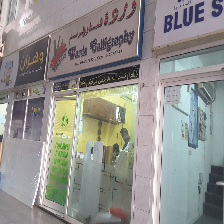

In [ ]:
tf.keras.preprocessing.image.load_img(calligraphyonthesignboard_path, target_size=(224,224))

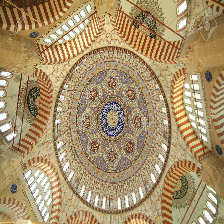

In [ ]:
tf.keras.preprocessing.image.load_img(calligraphyontheceiling_path, target_size=(224,224))

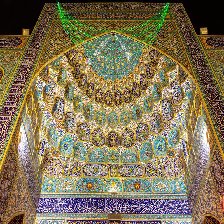

In [ ]:
tf.keras.preprocessing.image.load_img(calligraphyontheroof_path, target_size=(224,224))

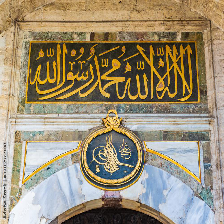

In [ ]:
tf.keras.preprocessing.image.load_img(calligraphyattheentrance_path, target_size=(224,224))

In [ ]:
print(f'''calligraphyonthesignboard:{np.round(model.predict(calligraphyonthesignboard),2)}''')

1/1 [==============================] - 1s 539ms/step
calligraphyonthesignboard:[[0.32 0.04 0.02 0.62]]


In [ ]:
print(f'''calligraphyontheceiling:{np.round(model.predict(calligraphyontheceiling),2)}''')

1/1 [==============================] - 0s 64ms/step
calligraphyontheceiling:[[0.06 0.6  0.11 0.23]]


In [ ]:
print(f'''calligraphyontheroof:{np.round(model.predict(calligraphyontheroof),2)}''')

1/1 [==============================] - 0s 65ms/step
calligraphyontheroof:[[0.22 0.4  0.23 0.15]]


In [ ]:
print(f'''calligraphyattheentrance:{np.round(model.predict(calligraphyattheentrance),2)}''')

1/1 [==============================] - 0s 62ms/step
calligraphyattheentrance:[[0.69 0.16 0.01 0.13]]
